In [1]:
# Importing Necessary liberary

import math
import time
from datetime import date, timedelta, datetime
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv(r'C:\Users\Dell\Desktop\Next Hikes Project_06\train.csv', na_values=['?', None, 'undefined'])
test = pd.read_csv(r'C:\Users\Dell\Desktop\Next Hikes Project_06\test.csv', na_values=['?', None, 'undefined'])
store = pd.read_csv(r'C:\Users\Dell\Desktop\Next Hikes Project_06\store.csv', na_values=['?', None, 'undefined'])


In [3]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Let's combine the store data with both train data.

In [6]:
df_train=train.merge(store,on="Store",how="inner")

df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


Let's check for missing values and duplicate data:

In [7]:
# check missing value
df_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [8]:
# check duplicated data:
df_train.loc[df_train.duplicated(keep=False), :]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


Note :- There is no duplicate value.

In [9]:
df_train.shape

(1017209, 18)

In [10]:
# Data Info:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

Let's convert the date data to date format and add the seasons to the dataset. Let's also add day, week, month, year variables.

In [11]:
df_train["Date"]=pd.to_datetime(df_train["Date"],infer_datetime_format=True)
df_train["Day"]=df_train["Date"].dt.day
df_train["Week"]=df_train["Date"].dt.isocalendar().week
df_train["Month"]=df_train["Date"].dt.month
df_train["Year"]=df_train["Date"].dt.year

# Seasons:
df_train["Season"]=np.where(df_train["Month"].isin([3,4,5]),"Spring",
                           np.where(df_train["Month"].isin([6,7,8]),"Summer",
                                   np.where(df_train["Month"].isin([9,10,11]),"Autumn",
                                           np.where(df_train["Month"].isin([12,1,2]),"Winter","None"))))

df_train[["Date","Day","Week","Month","Year","Season"]].head(20)

,Date,Day,Week,Month,Year,Season
0,2015-07-31,31,31,7,2015,Summer
1,2015-07-30,30,31,7,2015,Summer
2,2015-07-29,29,31,7,2015,Summer
3,2015-07-28,28,31,7,2015,Summer
4,2015-07-27,27,31,7,2015,Summer
5,2015-07-26,26,30,7,2015,Summer
6,2015-07-25,25,30,7,2015,Summer
7,2015-07-24,24,30,7,2015,Summer
8,2015-07-23,23,30,7,2015,Summer
9,2015-07-22,22,30,7,2015,Summer


In [12]:
df_train["Year"].value_counts()

Year
2013    406974
2014    373855
2015    236380
Name: count, dtype: int64

### Handling Missing Value¶

In this section, we will try to fill in the observations with missing values. Let's visualize the null values:

### CompetitionDistance¶

Let's check if we can fill the missing values contained in this variable according to the store ids.

In [13]:
# Let's look at the store ids
df_train["Store"].unique() 

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

In [14]:
df_train[df_train.CompetitionDistance.isnull()].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Week,Month,Year,Season
263244,291,5,2015-07-31,10052,973,1,1,0,1,d,...,NaN,0,NaN,NaN,NaN,31,31,7,2015,Summer
263245,291,4,2015-07-30,9030,883,1,1,0,1,d,...,NaN,0,NaN,NaN,NaN,30,31,7,2015,Summer
263246,291,3,2015-07-29,8204,814,1,1,0,1,d,...,NaN,0,NaN,NaN,NaN,29,31,7,2015,Summer
263247,291,2,2015-07-28,10374,943,1,1,0,1,d,...,NaN,0,NaN,NaN,NaN,28,31,7,2015,Summer
263248,291,1,2015-07-27,11692,1086,1,1,0,1,d,...,NaN,0,NaN,NaN,NaN,27,31,7,2015,Summer


In [15]:
store_id=df_train[df_train.CompetitionDistance.isnull()]["Store"].unique().tolist()

for i in store_id:
    print("Store Id: {}".format(i))
    print("len values: ",len(df_train[df_train["Store"]==i]["CompetitionDistance"]))
    print("missing value: ",df_train[df_train["Store"]==i]["CompetitionDistance"].isnull().sum())
    print("-"*20)

Store Id: 291
len values:  942
missing value:  942
--------------------
Store Id: 622
len values:  942
missing value:  942
--------------------
Store Id: 879
len values:  758
missing value:  758
--------------------


Note :- All CompetitionDistance values for store id 291,622,879 are empty. We cannot assign values to the id breakdown, so let's fill these values with the help of the mod.

In [16]:
df_train["CompetitionDistance"]=df_train["CompetitionDistance"].fillna(df_train["CompetitionDistance"].mode()[0])

In [17]:
df_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Day                               0
Week                              0
Month                             0
Year                              0
Season                            0
dtype: int64

In [18]:
#df_train[df_train.CompetitionOpenSinceMonth.isnull()]["Store"].unique()

In [19]:
df_train["CompetitionOpenSinceMonth"].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [20]:
df_train["CompetitionOpenSinceYear"].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [21]:
store_id2=df_train[df_train.CompetitionOpenSinceMonth.isnull()]["Store"].unique().tolist()

for i in store_id2[:8]:
    print("Store Id: {}".format(i))
    print("len values: ",len(df_train[df_train["Store"]==i]["CompetitionOpenSinceMonth"]))
    print("missing value: ",df_train[df_train["Store"]==i]["CompetitionOpenSinceMonth"].isnull().sum())
    print("-"*20)

Store Id: 12
len values:  942
missing value:  942
--------------------
Store Id: 13
len values:  758
missing value:  758
--------------------
Store Id: 16
len values:  942
missing value:  942
--------------------
Store Id: 19
len values:  942
missing value:  942
--------------------
Store Id: 22
len values:  758
missing value:  758
--------------------
Store Id: 26
len values:  942
missing value:  942
--------------------
Store Id: 29
len values:  942
missing value:  942
--------------------
Store Id: 32
len values:  758
missing value:  758
--------------------


In [22]:
store_id3=df_train[df_train.CompetitionOpenSinceYear.isnull()]["Store"].unique().tolist()

for i in store_id3[:8]:
    print("Store Id: {}".format(i))
    print("len values: ",len(df_train[df_train["Store"]==i]["CompetitionOpenSinceYear"]))
    print("missing value: ",df_train[df_train["Store"]==i]["CompetitionOpenSinceYear"].isnull().sum())
    print("-"*20)

Store Id: 12
len values:  942
missing value:  942
--------------------
Store Id: 13
len values:  758
missing value:  758
--------------------
Store Id: 16
len values:  942
missing value:  942
--------------------
Store Id: 19
len values:  942
missing value:  942
--------------------
Store Id: 22
len values:  758
missing value:  758
--------------------
Store Id: 26
len values:  942
missing value:  942
--------------------
Store Id: 29
len values:  942
missing value:  942
--------------------
Store Id: 32
len values:  758
missing value:  758
--------------------


Note :- We cannot fill in these empty values in the store id breakdown. Let's fill these with 0:

In [23]:
df_train[["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"]]=df_train[["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"]].fillna(0)
df_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Day                               0
Week                              0
Month                             0
Year                              0
Season                            0
dtype: int64

### Promo2SinceWeek, Promo2SinceYear and PromoInterval¶

Let's check if there are empty observations in the Promo2SinceWeek, Promo2SinceYear and PromoInterval variables for stores running campaigns:

In [24]:
df_train[df_train["Promo2"]==1][["Store","Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"]].isnull().sum()

Store              0
Promo2             0
Promo2SinceWeek    0
Promo2SinceYear    0
PromoInterval      0
dtype: int64

Note :- There are no empty values based on these variables in the stores participating in the campaign. These variables of stores that did not participate in the campaign contain empty values. Let's fill empty values with 0:

In [25]:
df_train[["Store","Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"]]=df_train[["Store","Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"]].fillna(0)
df_train.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Day                          0
Week                         0
Month                        0
Year                         0
Season                       0
dtype: int64

### Exploratory Data Analysis¶

In this section, we will examine the data and make inferences from the data.

In [26]:
print("Total number of stores: {}".format(len(df_train["Store"].unique())))
print("Average daily sales amount: {}".format(round(df_train["Sales"].mean(),2)))
print("Average daily sales per store: {}".format(round(df_train["Sales"].mean(),2)/len(df_train["Store"].unique())))

Total number of stores: 1115
Average daily sales amount: 5773.82
Average daily sales per store: 5.178313901345291


Let's examine sales of each year in promotion breakdown.

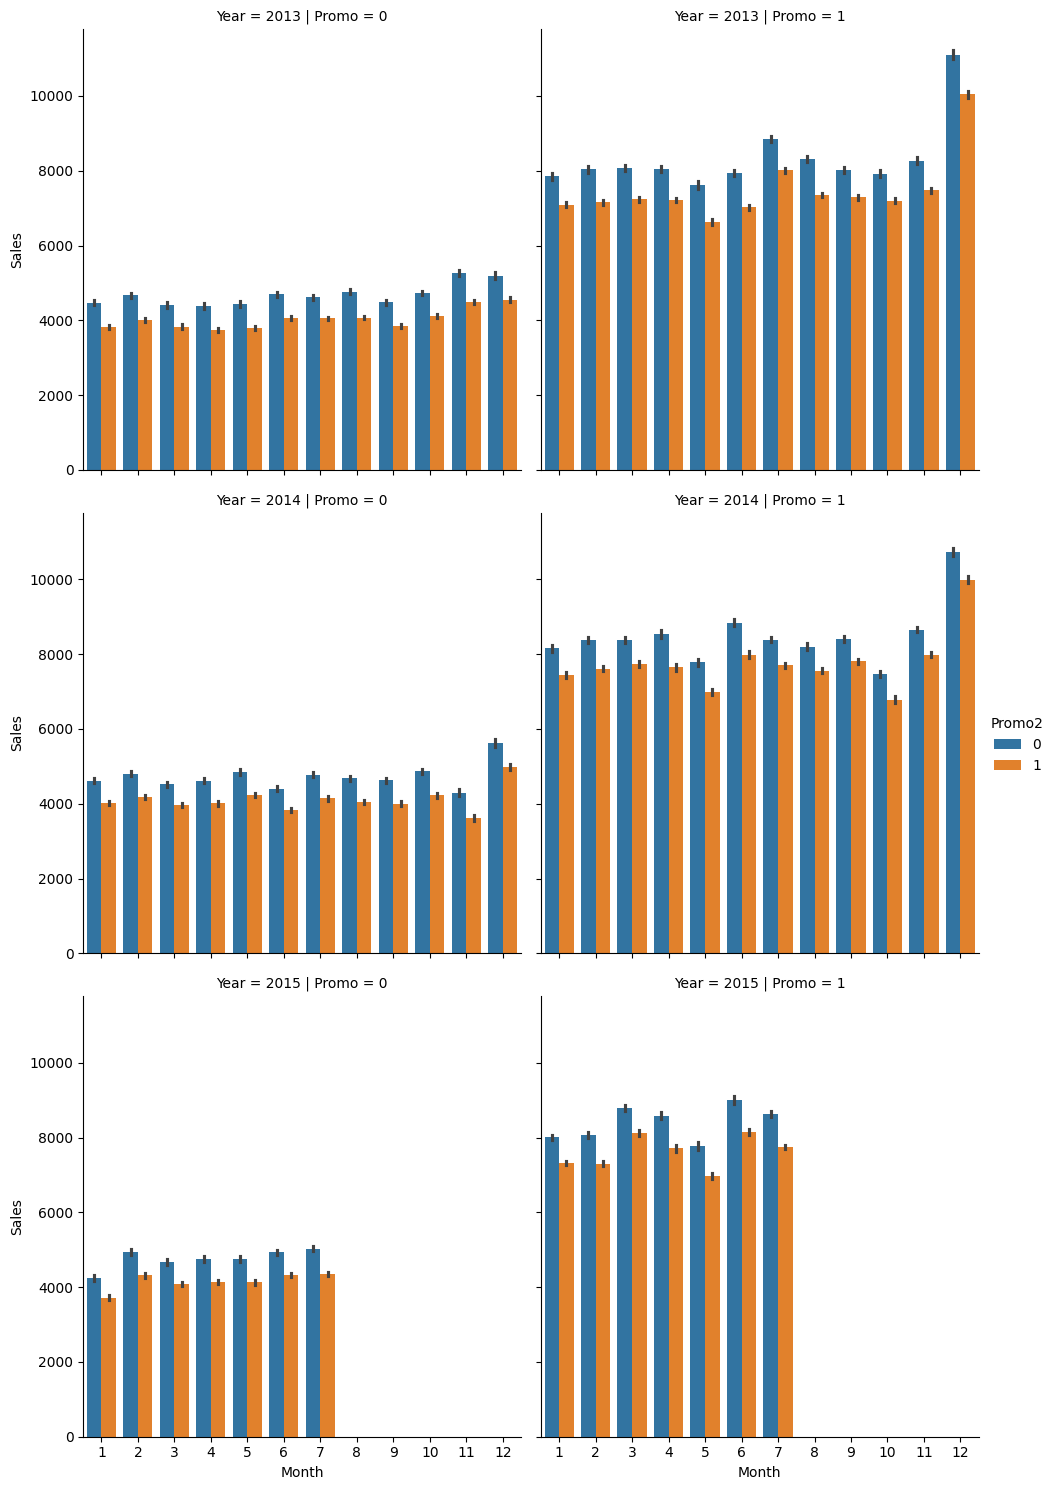

In [27]:
sns.catplot(data = df_train, x='Month', y='Sales',
              col ='Promo', hue='Promo2', row='Year', kind="bar")
plt.show()

Note : - 
* We see that the campaigns carried out by the stores themselves and the campaigns jointly organized by the company have an increasing effect on sales.

* Strong sales are achieved when participating in the corporate campaign in the last month of the year.

Average sales by product type¶

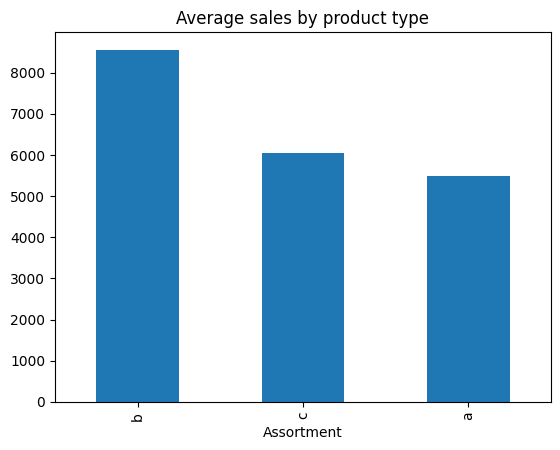

In [28]:
group1=df_train.groupby("Assortment")["Sales"].mean().sort_values(ascending=False)
group1.plot(kind="bar")
plt.title("Average sales by product type")
plt.show()

Note :
* The product group with the highest sales volume is extra products.

Average sales by store type

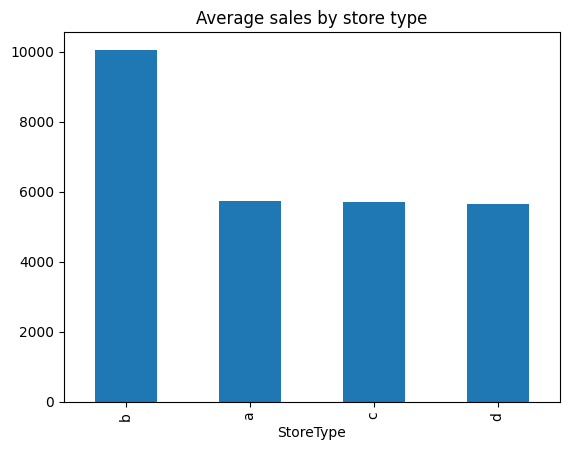

In [29]:
group2=df_train.groupby("StoreType")["Sales"].mean().sort_values(ascending=False)
group2.plot(kind="bar")
plt.title("Average sales by store type")
plt.show()

Let's examine sales according seasonals:

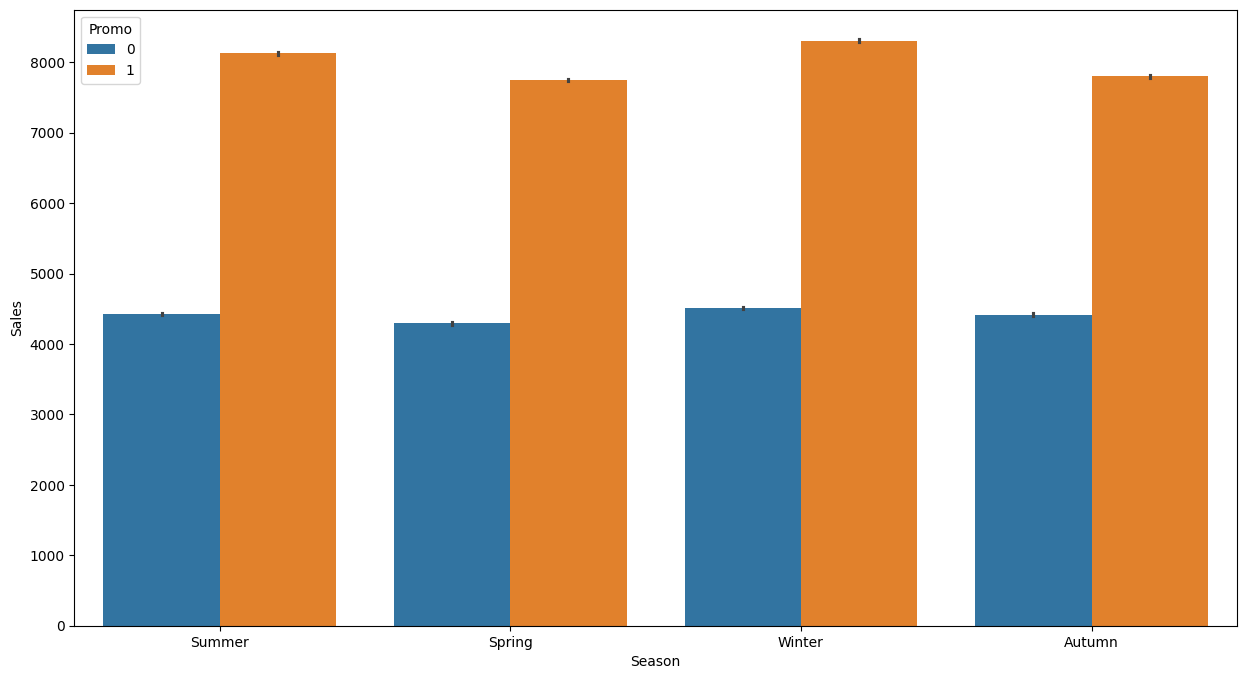

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(x="Season",y="Sales",data=df_train, hue="Promo")
plt.show()

Note :- There are more sales in summer and winter months. But there is no clear distinction.

Store types with the highest sales volume:

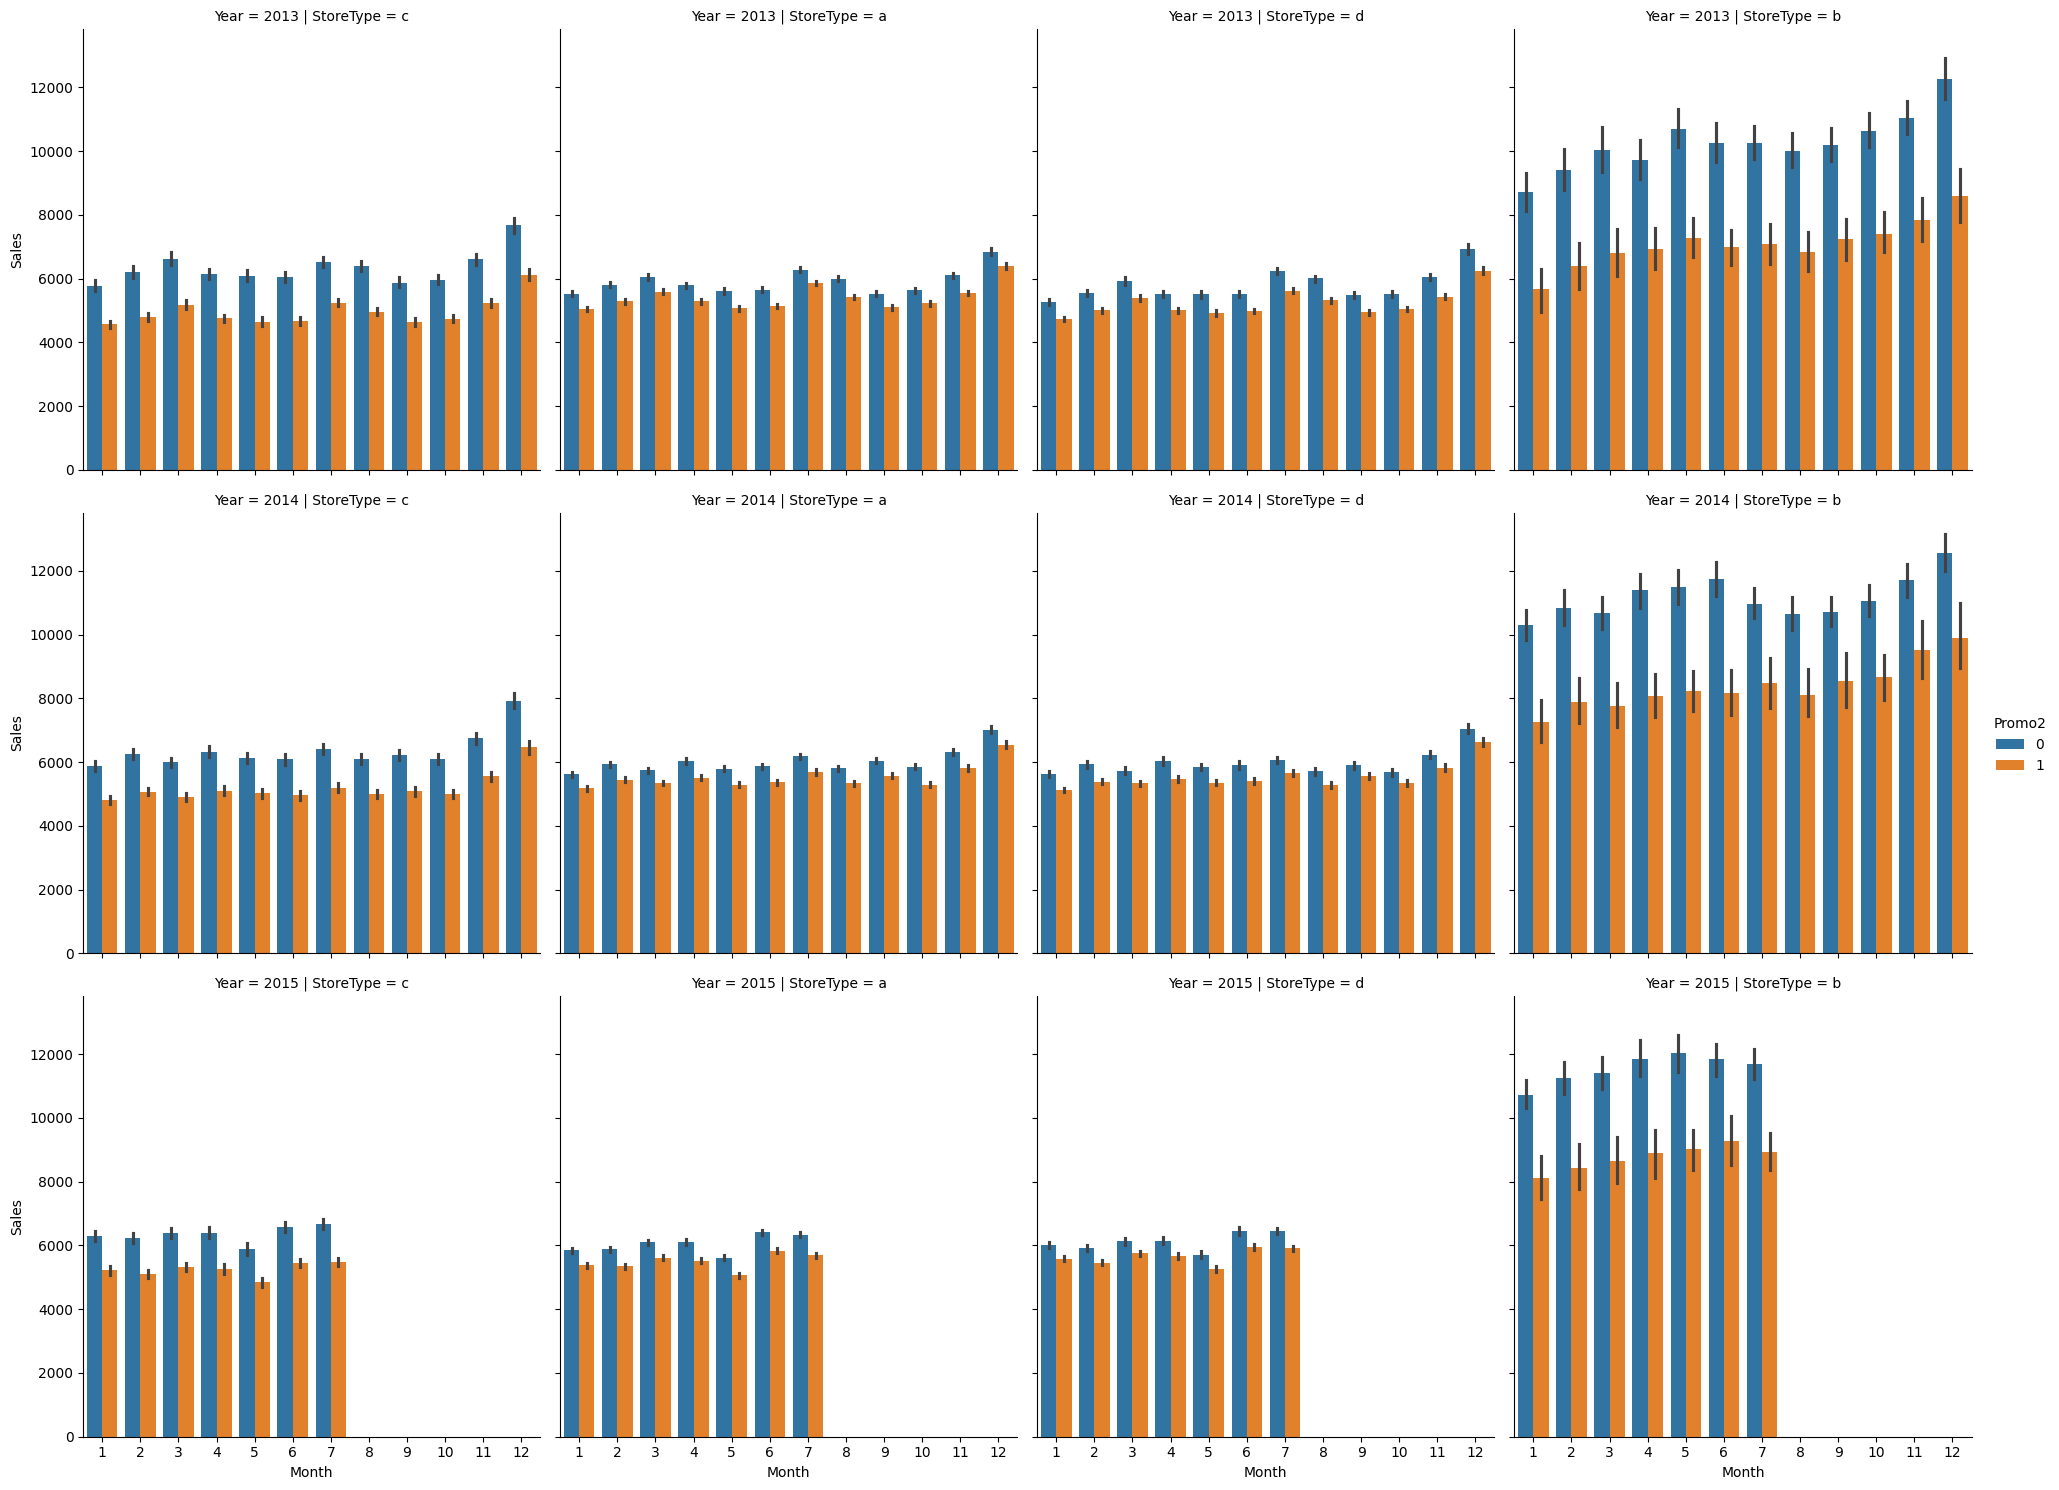

In [31]:
sns.catplot(data = df_train, x='Month', y='Sales',
              col ='StoreType', hue='Promo2', row='Year', kind="bar")
plt.show()

Note :- Type B stores have the highest sales volume.

Sales performance of product variety according to campaign status:

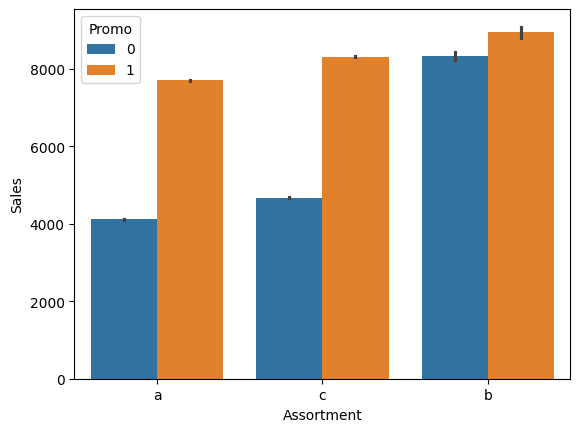

In [32]:
sns.barplot(x="Assortment",y="Sales",hue="Promo",data=df_train);

Note :- Extra products have strong sales volume with or without a campaign. For other products, sales volume increases during campaign periods.

Distribution of customer numbers according to campaign status:

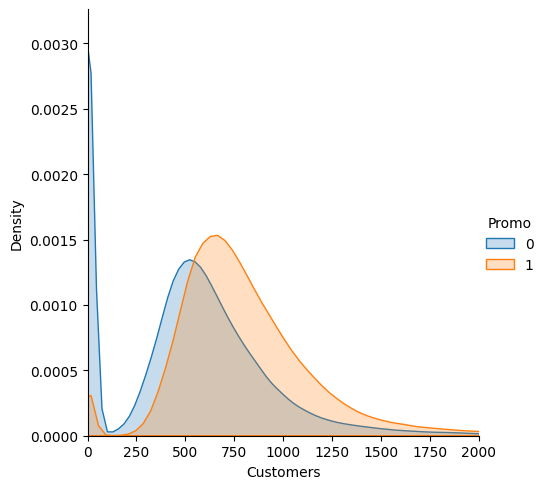

In [33]:
(sns
 .FacetGrid(df_train,
         hue="Promo",
         height=5,
         xlim=(0,2000))
 .map(sns.kdeplot,"Customers",shade=True)
 .add_legend()
);

Note :- The number and frequency of customers increases during campaign periods.

Effect of special days on sales:

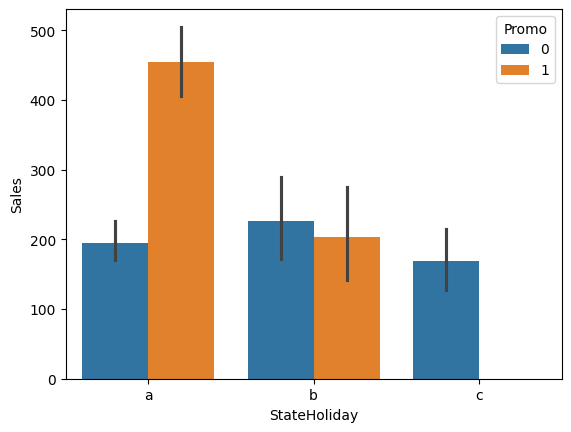

In [34]:
special_days_sales=df_train[df_train["StateHoliday"].isin(["a","b","c"])]
sns.barplot(x="StateHoliday",y="Sales",hue="Promo",data=special_days_sales);

Note :- Public holidays are repeated more frequently throughout the year than other holidays. Therefore, the highest sales volume occurs on public holidays and running campaigns has a positive effect on increasing sales.

Let's combine the first similar columns into a single column:

In [35]:
df_train["CompetitionOpen"]=12*(df_train["Year"]-df_train["CompetitionOpenSinceYear"])+(df_train["Month"]-df_train["CompetitionOpenSinceMonth"])
# We converted the year to month and added the month values.
df_train["PromoOpen"]=12*(df_train["Year"]-df_train["Promo2SinceYear"])+(df_train["Week"]-df_train["Promo2SinceWeek"])/4.0
# We converted the year to month and added the week values.

<Figure size 1500x1200 with 0 Axes>

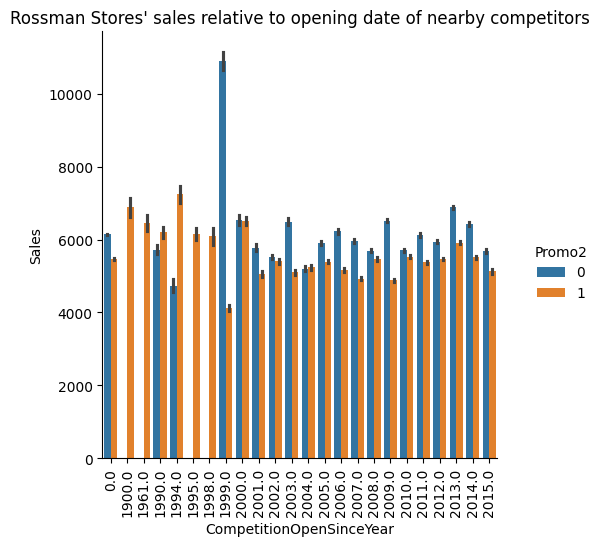

In [36]:
plt.figure(figsize=(15,12))
sns.catplot(data = df_train, x='CompetitionOpenSinceYear', y='Sales', hue='Promo2', kind="bar")
plt.xticks(rotation=90)
plt.title("Rossman Stores' sales relative to opening date of nearby competitors")
plt.show()

Note :- 
Stores close to rival stores that have been in service for many years can increase their market share when they run campaigns.

We can say that the competitive situation is strong against stores established after 1999.

Change in sales per customer according to seasons

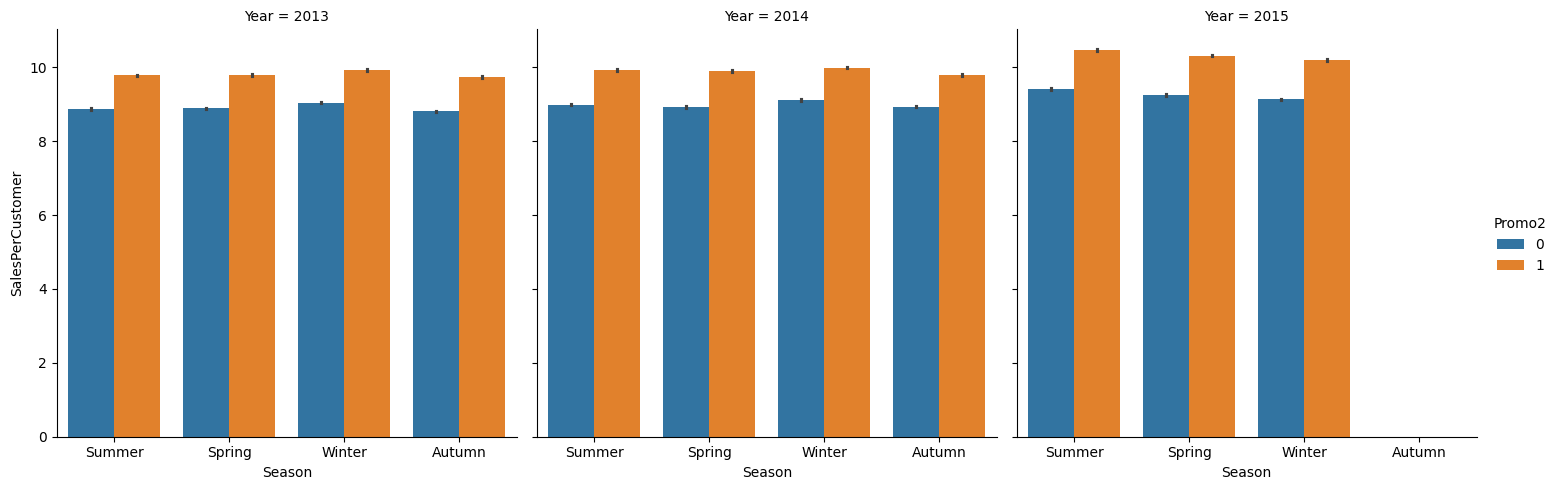

In [37]:
df_train["SalesPerCustomer"]=df_train["Sales"]/df_train["Customers"]

sns.catplot(data = df_train, x='Season', y='SalesPerCustomer', hue='Promo2', col='Year', kind="bar")
plt.show()

Note : There has been an increase in sales per customer in the last year

In [38]:
df_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
Day                               0
Week                              0
Month                             0
Year                              0
Season                            0
CompetitionOpen                   0
PromoOpen                         0
SalesPerCustomer             172869
dtype: int64

In [39]:
# SalesPerCustomer includes 172869 missing value. Sales=0/Customer=0=NA - > Let's look at the sales on the days the store was closed.
df_not_oppen=df_train[df_train.Open==0]
df_not_oppen[(df_not_oppen["Sales"]==0) | (df_not_oppen["Customers"]==0)].shape

(172817, 26)

In [40]:
df_train[(df_train.Open == 1) & (df_train.Sales == 0)].shape[0]

54

There are null values due to the above situations. Let's fill these with 0:

In [41]:
df_train["SalesPerCustomer"]=df_train["SalesPerCustomer"].fillna(0)

In [42]:
df_train.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Day                          0
Week                         0
Month                        0
Year                         0
Season                       0
CompetitionOpen              0
PromoOpen                    0
SalesPerCustomer             0
dtype: int64

Effect of days of the week on sales by product type

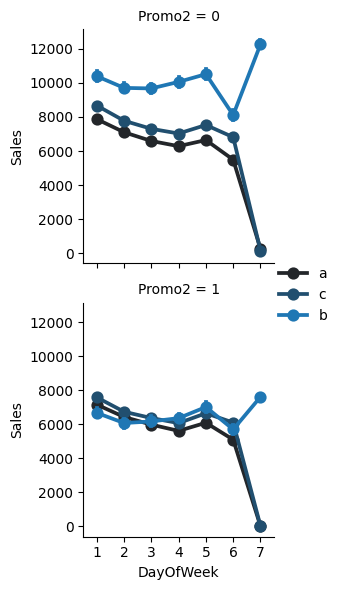

In [43]:
g=sns.FacetGrid(df_train, row="Promo2")
g.map(sns.pointplot, "DayOfWeek", "Sales", "Assortment")
g.add_legend()
plt.show()

Note : Here we can see that the best selling products are type b products. We see that stores selling type B products are open on Sundays, while stores selling other products are closed on Sundays.

In [44]:
df_train.drop(["CompetitionOpenSinceYear","CompetitionOpenSinceMonth","Promo2SinceYear","Promo2SinceWeek"],axis=1,inplace=True)
df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'PromoInterval', 'Day', 'Week',
       'Month', 'Year', 'Season', 'CompetitionOpen', 'PromoOpen',
       'SalesPerCustomer'],
      dtype='object')

Let's examine the effect of categorical and numerical variables on the dependent variable:¶

In [45]:
numerical_col =["Customers","CompetitionDistance","CompetitionOpen","PromoOpen","SalesPerCustomer","Sales"] # numerical
categorical_col =["DayOfWeek","StateHoliday","SchoolHoliday", "StoreType","Assortment","Open","Promo","Promo2","Week","Month","Year","Season","PromoInterval"] # category

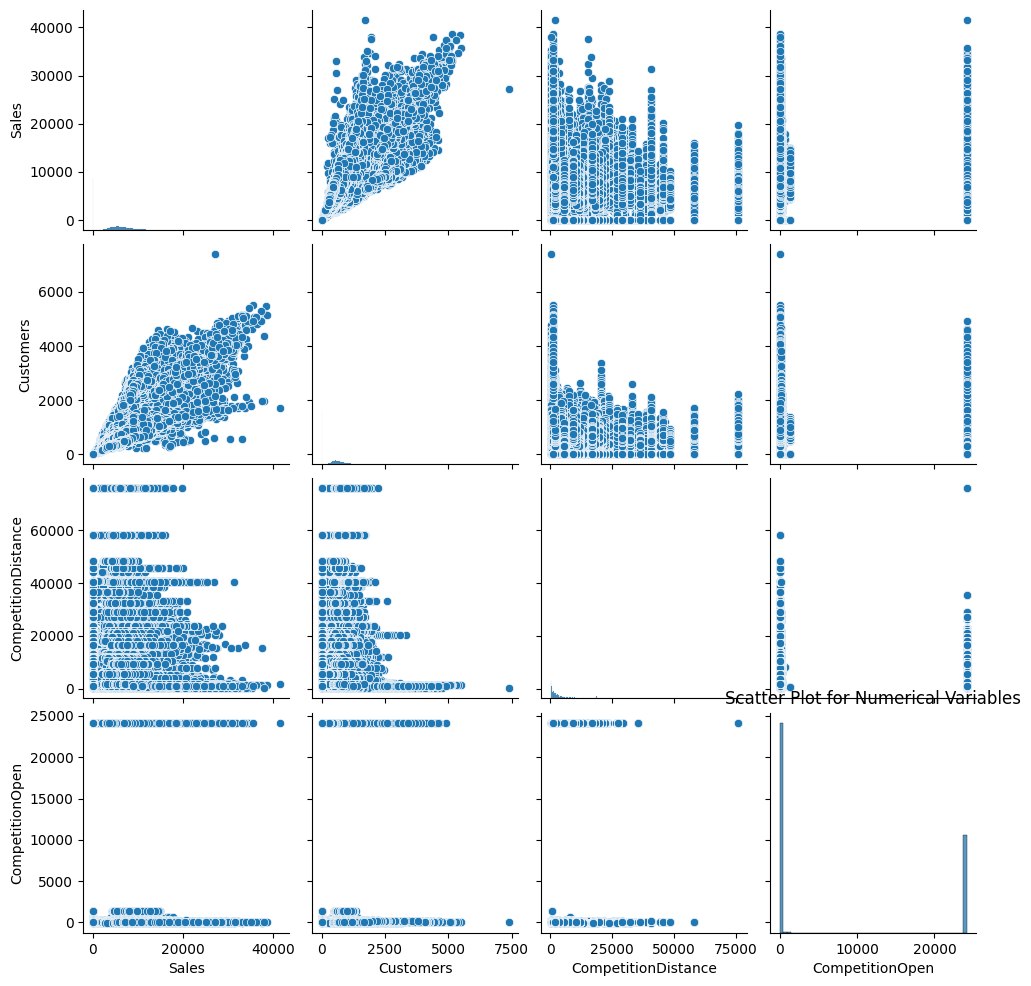

In [46]:
sns.pairplot(df_train[["Sales","Customers","CompetitionDistance","CompetitionOpen"]])
plt.title("Scatter Plot for Numerical Variables")
plt.show()

Note : We see that there is a positive correlation between customers and sales. Other variables do not appear to be related to the dependent variable. We'll see when we do the correlation analysis.

In [47]:
m={0:"0","0":"0","a":"a","b":"b","c":"c"}
df_train["StateHoliday"]=df_train["StateHoliday"].map(m)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

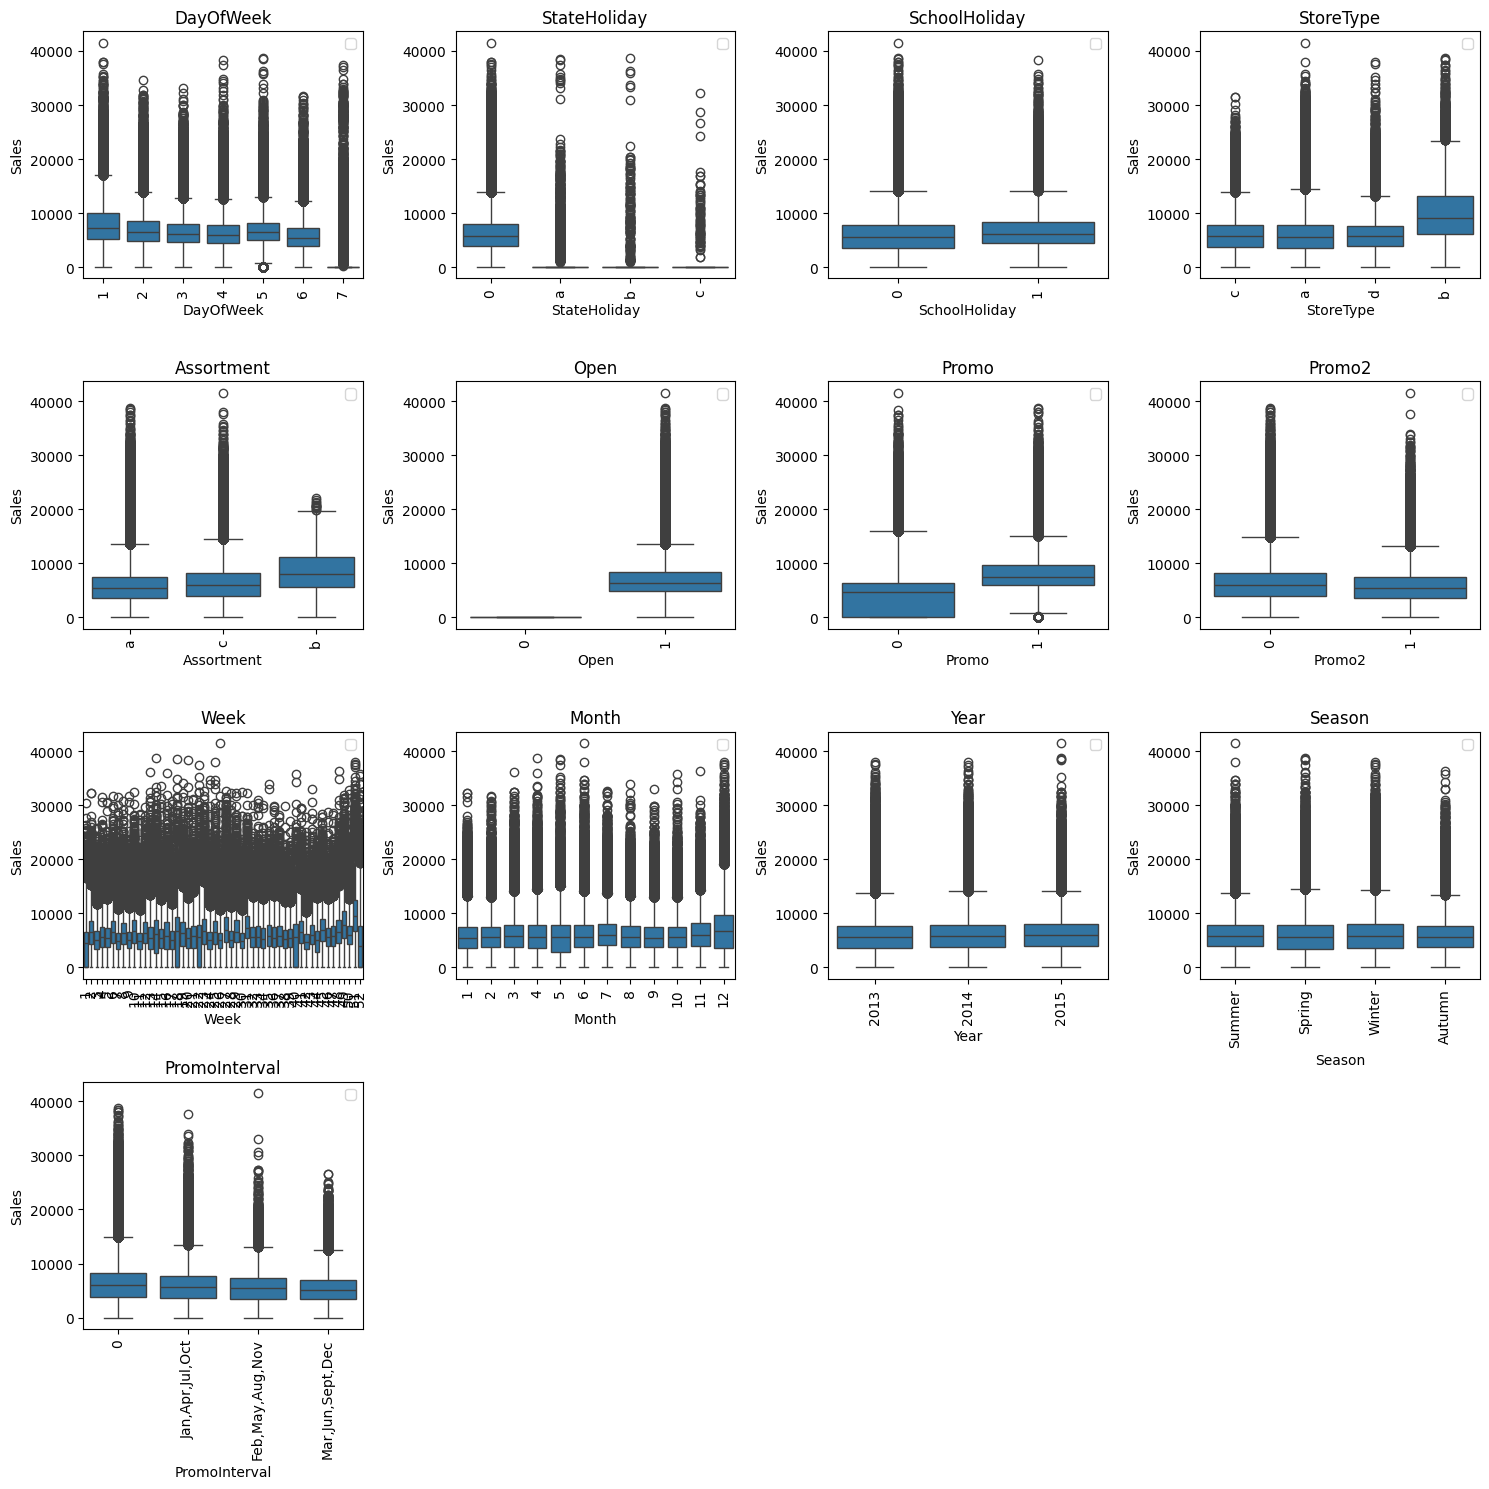

In [48]:
plt.figure(figsize=(15,15))
for ax, col in enumerate(categorical_col):
    plt.subplot(4,4, ax+1)
    plt.title(col)
    sns.boxplot(x=col, y="Sales", data=df_train)
    plt.xticks(rotation=90)
    plt.legend()

plt.tight_layout()

Correlation Analysis:¶

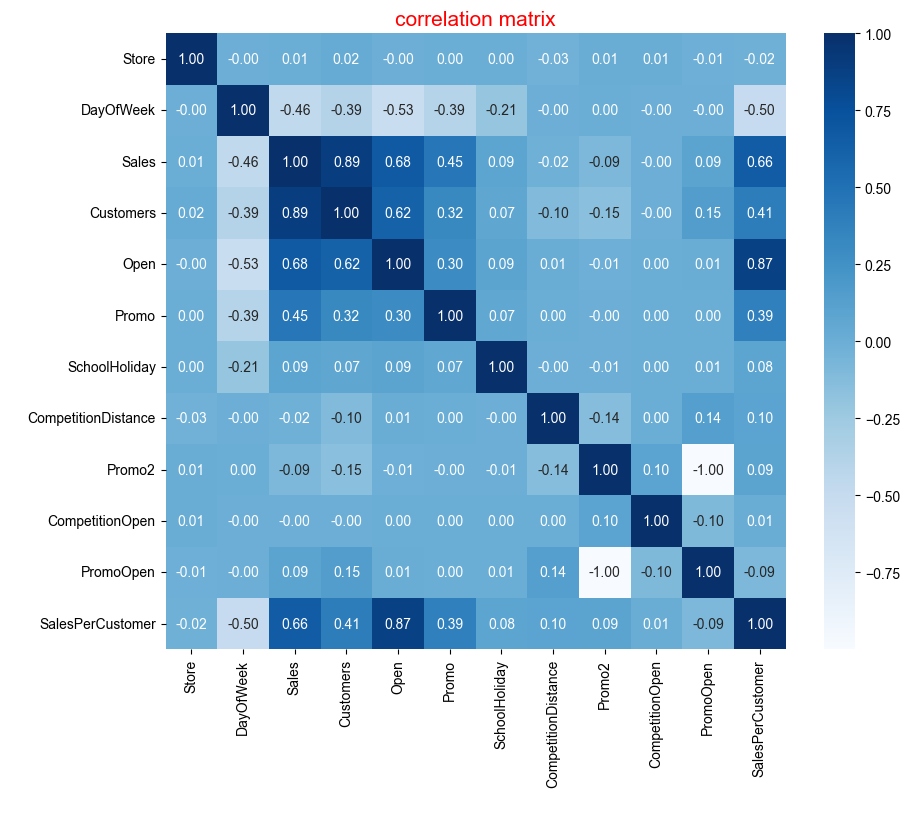

In [49]:
# correlation analysis
df_corr=df_train.select_dtypes(include=["float64","int64"]).corr()

plt.figure(figsize=(10,8))
plt.title("correlation matrix", color="red", fontsize=15)
sns.heatmap(df_corr,annot=True,cmap="Blues", fmt=".2f")
sns.set(font_scale=1,style='white')
plt.show()

Note: SalesPer has a high correlation with Customers Open. Let's remove the SalesPer Customers variable from our data set:

In [50]:
df_train.drop("SalesPerCustomer",axis=1,inplace=True)

Check for distribution in both training and test sets - are the promotions
distributed similarly between these two groups?

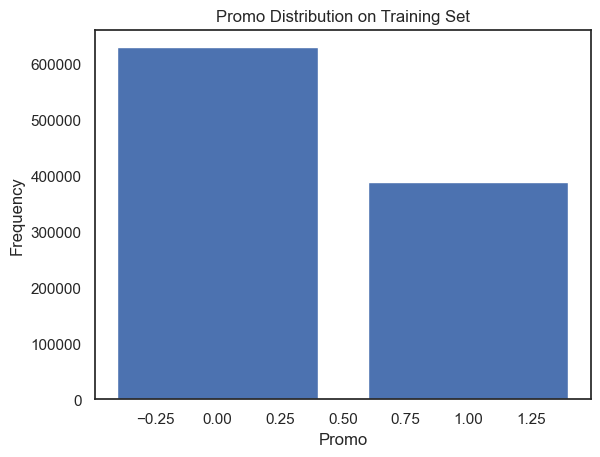

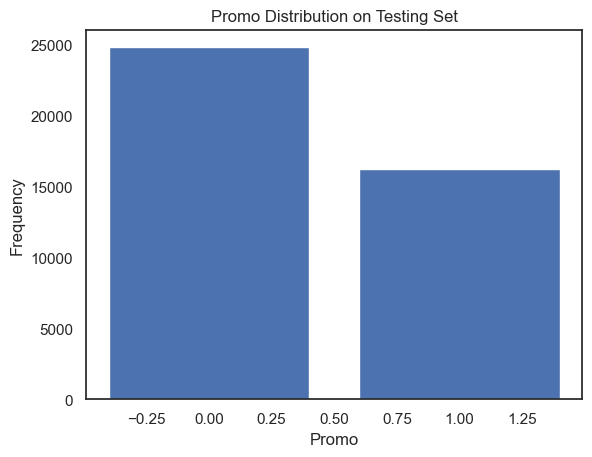

In [51]:
# Assuming df_train and test_df are already defined

train_distribution = df_train['Promo'].value_counts()
test_distribution = test['Promo'].value_counts()

# Plotting the distributions
plt.bar(train_distribution.index, train_distribution)
plt.title("Promo Distribution on Training Set")
plt.xlabel("Promo")
plt.ylabel("Frequency")
plt.show()

plt.bar(test_distribution.index, test_distribution)
plt.title("Promo Distribution on Testing Set")
plt.xlabel("Promo")
plt.ylabel("Frequency")
plt.show()

Check & compare sales behavior before, during and after holidays

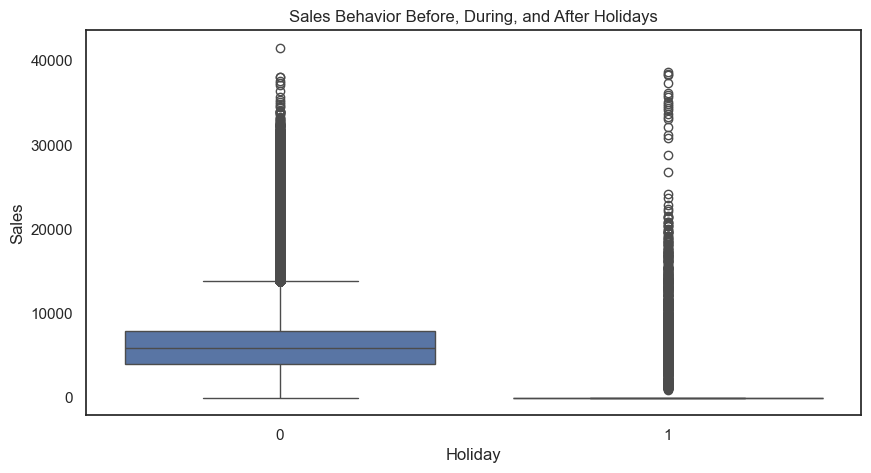

In [52]:
# Sales behavior before, during, and after holidays
# Create a column to indicate holiday
df_train['Holiday'] = df_train['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)
plt.figure(figsize=(10, 5))
sns.boxplot(x='Holiday', y='Sales', data=df_train)
plt.title('Sales Behavior Before, During, and After Holidays')
plt.xlabel('Holiday')
plt.ylabel('Sales')
plt.show()

Find out any seasonal (Christmas, Easter etc) purchase behaviours

In [53]:
train_data = df_train.copy()

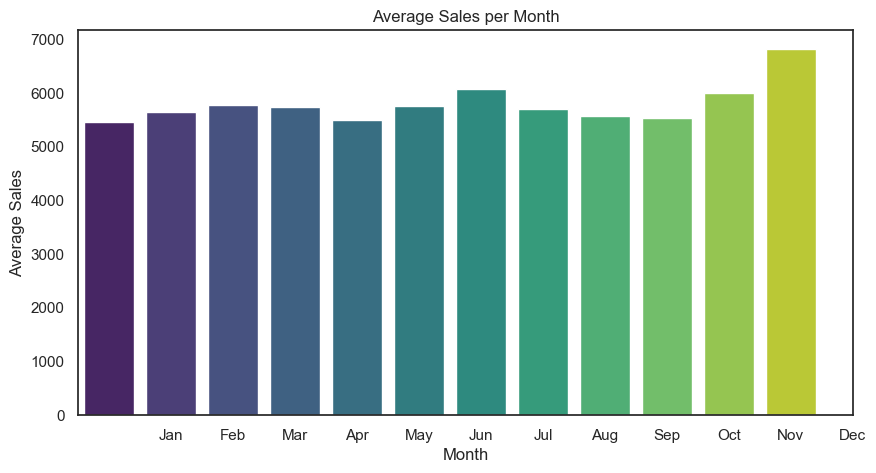

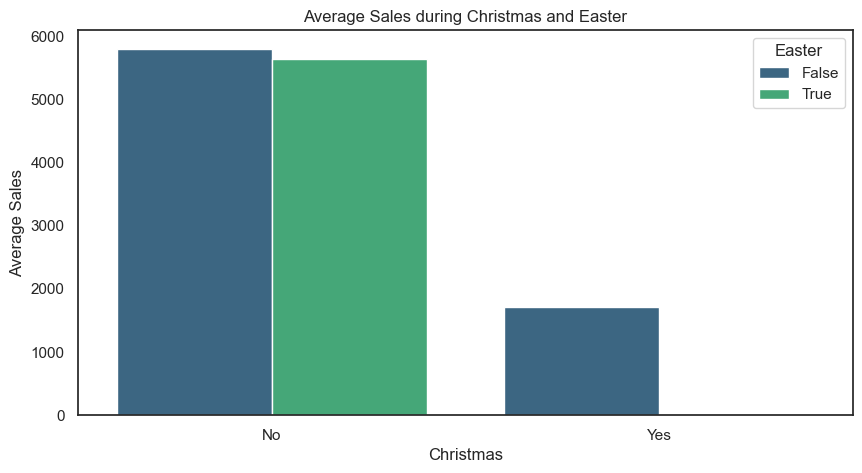

In [54]:
# Convert the date column to datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Extract month and year from the Date column
train_data['Month'] = train_data['Date'].dt.month
train_data['Year'] = train_data['Date'].dt.year

# Define holiday periods
christmas = [(12, 24), (12, 25), (12, 26)]  # Christmas is in December
easter = [(4, 10), (4, 11), (4, 12)]        # Easter is typically in April, specific dates vary

# Check if each date is in a holiday period
train_data['Is_Christmas'] = train_data[['Month', 'Day']].apply(lambda x: tuple(x) in christmas, axis=1)
train_data['Is_Easter'] = train_data[['Month', 'Day']].apply(lambda x: tuple(x) in easter, axis=1)


# Aggregate sales data over different months or seasons
monthly_sales = train_data.groupby(['Month'])['Sales'].mean().reset_index()

# Plot the average sales per month
plt.figure(figsize=(10, 5))
sns.barplot(x='Month', y='Sales', data=monthly_sales, palette='viridis')
plt.title('Average Sales per Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Plot the average sales during Christmas and Easter periods
holiday_sales = train_data.groupby(['Is_Christmas', 'Is_Easter'])['Sales'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='Is_Christmas', y='Sales', hue='Is_Easter', data=holiday_sales, palette='viridis')
plt.title('Average Sales during Christmas and Easter')
plt.xlabel('Christmas')
plt.ylabel('Average Sales')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Easter')
plt.show()

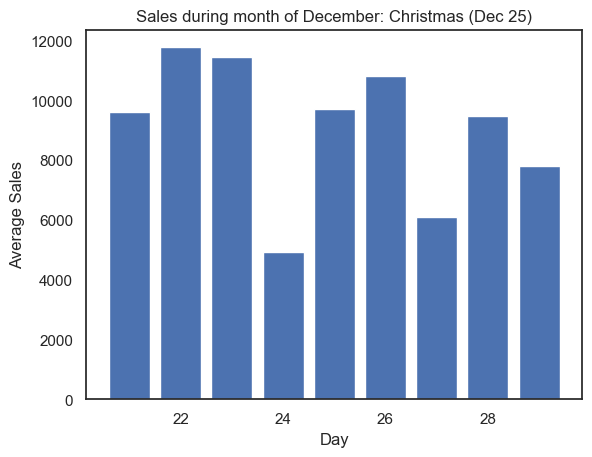

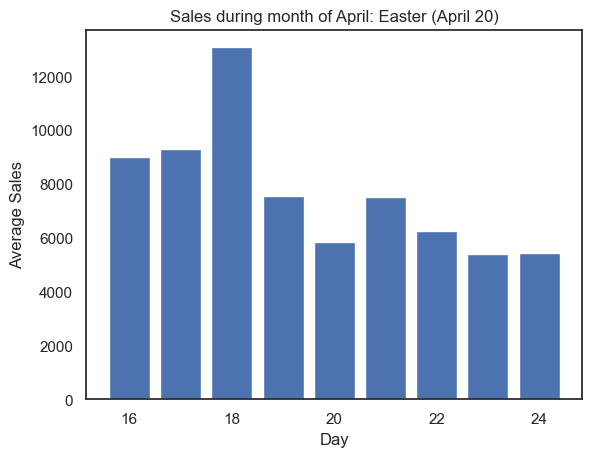

In [55]:
open_store = train_data[(train_data.Open == 1) & (train_data.Year == 2014)]

christmass_month = 12
eastern_month = 4

christmass_month = open_store[open_store.Month == christmass_month]
eastern_month = open_store[open_store.Month == eastern_month]

# plot.bar(chris['Day'], chris['Sales'], 'Sales during month of December: Christmas (Dec 25)')
# plot.bar(eastern['Day'], eastern['Sales'], 'Sales during month of April: Eastern (April 20)')

around_christmas = christmass_month[(christmass_month['Day'] > 20) & (christmass_month['Day'] < 30)]
around_christmas = around_christmas[['Day', 'Sales']].groupby('Day').mean()


around_eastern = eastern_month[(eastern_month['Day'] > 15) & (eastern_month['Day'] < 25)]
around_eastern = around_eastern[['Day', 'Sales']].groupby('Day').mean()

# Assuming you have already calculated around_christmas and around_eastern

# Plotting sales around Christmas
plt.bar(around_christmas.index, around_christmas['Sales'])
plt.title('Sales during month of December: Christmas (Dec 25)')
plt.xlabel('Day')
plt.ylabel('Average Sales')
plt.show()

# Plotting sales around Easter
plt.bar(around_eastern.index, around_eastern['Sales'])
plt.title('Sales during month of April: Easter (April 20)')
plt.xlabel('Day')
plt.ylabel('Average Sales')
plt.show()

What can you say about the correlation between sales and number of
customers?


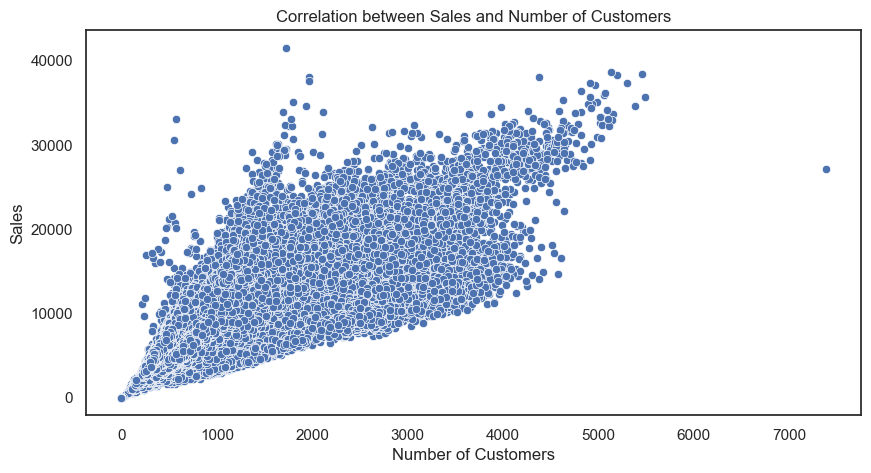

In [56]:
# Correlation between sales and number of customers
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Customers', y='Sales', data=train_data)
plt.title('Correlation between Sales and Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

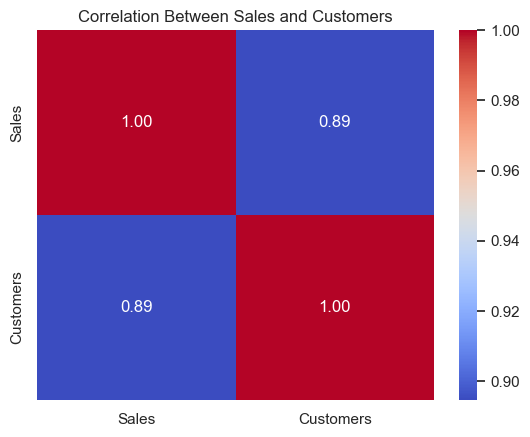

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_store dataframe is already defined

# Calculate correlation matrix
correlation_matrix = train_data[['Sales', 'Customers']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Sales and Customers')
plt.show()

Note:-Insight :-> There is a high correlation b/n Sales and Customers. The more customers the more sales

How does promo affect sales? Are the promos attracting more customers? How
does it affect already existing customers?


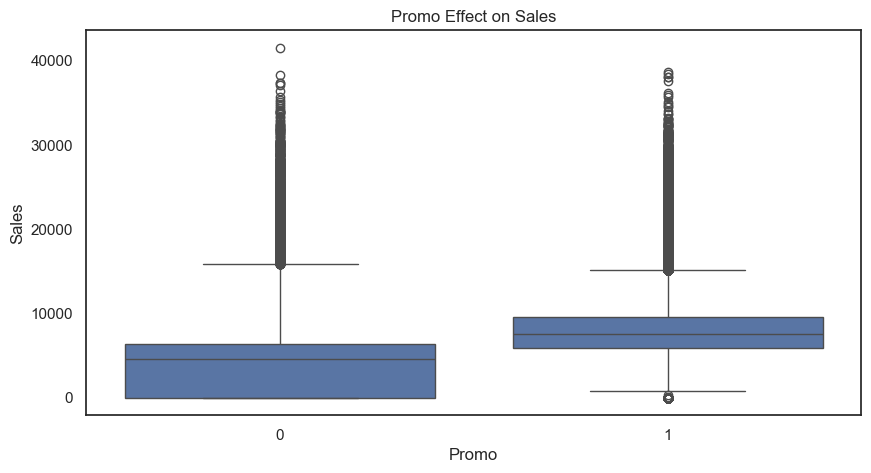

In [58]:
# Promo effect on sales
plt.figure(figsize=(10, 5))
sns.boxplot(x='Promo', y='Sales', data=train_data)
plt.title('Promo Effect on Sales')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

<Figure size 1200x700 with 0 Axes>

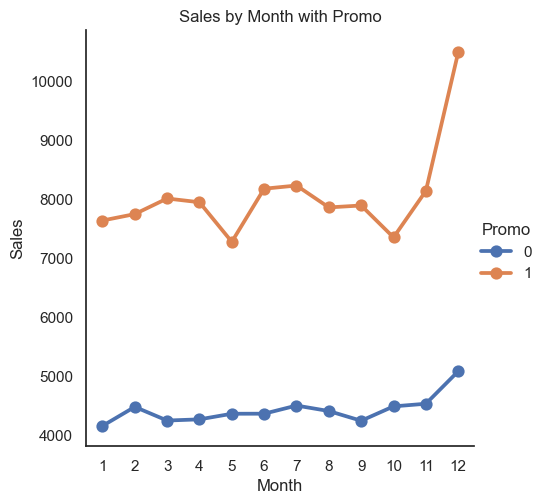

In [59]:
plt.figure(figsize=(12,7))
sns.catplot(data=train_data, x="Month", y="Sales", hue='Promo', kind='point', sharex=False)
plt.title('Sales by Month with Promo')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


Note:-Insight :-> Having a promotion increase the Sales and also the customers

Could the promos be deployed in more effective ways? Which stores should
promos be deployed in?


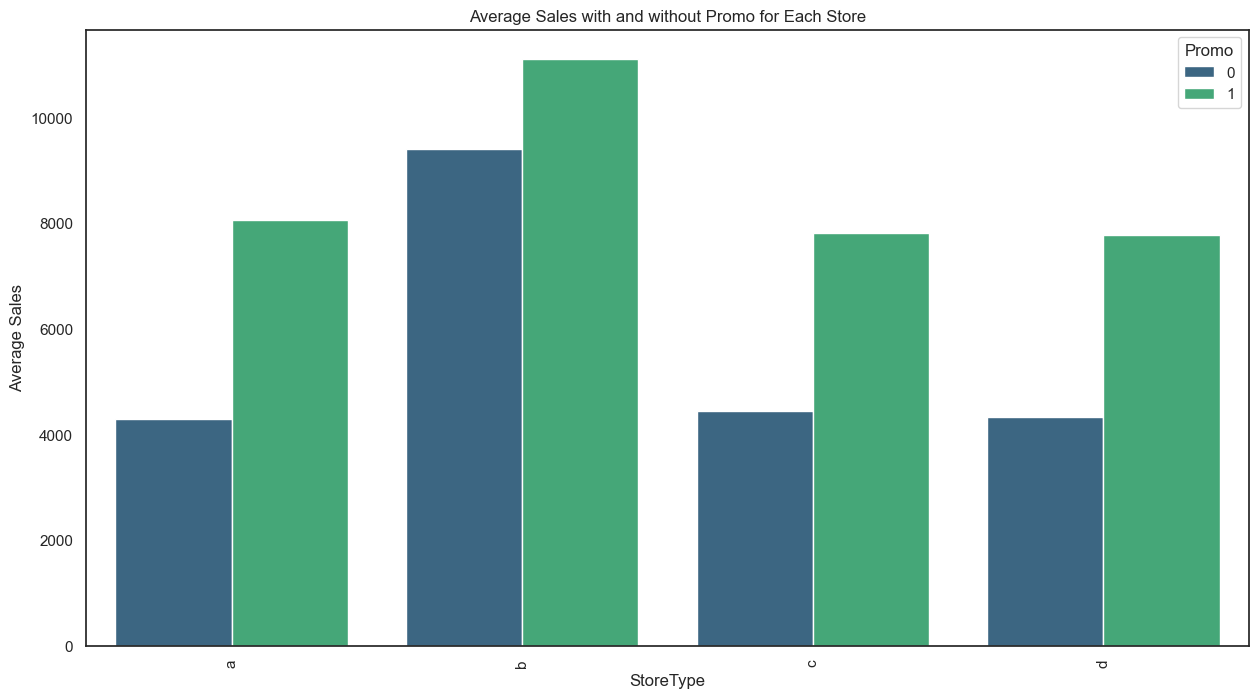

Top Stores with Highest Positive Impact of Promo on Sales:
Promo StoreType            0             1  Promo_Impact
0             a  4300.418175   8068.080939   3767.662764
3             d  4326.661817   7776.593414   3449.931597
2             c  4435.040156   7810.174738   3375.134582
1             b  9409.434791  11109.739497   1700.304706


In [60]:
# Aggregate sales data by store and promo
store_promo_sales = train_data.groupby(['StoreType', 'Promo'])['Sales'].mean().reset_index()

# Plot average sales with and without promo for each store
plt.figure(figsize=(15, 8))
sns.barplot(x='StoreType', y='Sales', hue='Promo', data=store_promo_sales, palette='viridis')
plt.title('Average Sales with and without Promo for Each Store')
plt.xlabel('StoreType')
plt.ylabel('Average Sales')
plt.xticks(rotation=90)
plt.legend(title='Promo')
plt.show()

# Determine the impact of promos on sales by calculating the difference in sales with and without promo
store_promo_impact = store_promo_sales.pivot(index='StoreType', columns='Promo', values='Sales').reset_index()
store_promo_impact['Promo_Impact'] = store_promo_impact[1] - store_promo_impact[0]

# Identify stores where promos have the highest positive impact on sales
top_promo_stores = store_promo_impact.nlargest(10, 'Promo_Impact')

print("Top Stores with Highest Positive Impact of Promo on Sales:")
print(top_promo_stores)

In [61]:
promos_store = train_data[['Store','StoreType','Promo','Sales','Customers']]

In [62]:
promos_store = promos_store.groupby(['StoreType',"Promo"]).\
                agg({'Store':"count","Sales":"sum","Customers":"sum"})
promos_store

Store       Sales  Customers
StoreType Promo                               
a         0      341123  1466971549  180276608
          1      210504  1698363310  183264826
b         0        9784    92061910   18685985
          1        6046    67169485   12779636
c         0       84596   375186657   47222206
          1       52244   408034769   44907499
d         0      193626   837754221   79593008
          1      119286   927638722   77311987

Note:-Note: as we can see from above table if we deploy promo in StoreType a we can both attract more customer and there is a huge increase in Sales relative to the other stores

Trends of customer behavior during store open and closing times

In [63]:
train_data.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Day,Week,Month,Year,Season,CompetitionOpen,PromoOpen,Holiday,Is_Christmas,Is_Easter
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,31,31,7,2015,Summer,82.0,24187.75,0,False,False
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,30,31,7,2015,Summer,82.0,24187.75,0,False,False
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,29,31,7,2015,Summer,82.0,24187.75,0,False,False


In [64]:
train_data[df_train['Open'] == 1]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Day,Week,Month,Year,Season,CompetitionOpen,PromoOpen,Holiday,Is_Christmas,Is_Easter
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,31,31,7,2015,Summer,82.0,24187.75,0,False,False
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,30,31,7,2015,Summer,82.0,24187.75,0,False,False
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,29,31,7,2015,Summer,82.0,24187.75,0,False,False
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,28,31,7,2015,Summer,82.0,24187.75,0,False,False
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,27,31,7,2015,Summer,82.0,24187.75,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,1,2013-01-07,6905,471,1,1,0,1,d,...,7,2,1,2013,Winter,24157.0,7.0,0,False,False
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,...,5,1,1,2013,Winter,24157.0,6.75,0,False,False
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,...,4,1,1,2013,Winter,24157.0,6.75,0,False,False
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,...,3,1,1,2013,Winter,24157.0,6.75,0,False,False


In [65]:
data_open_state = train_data[['Open','Customers']]
data_open_state = data_open_state.groupby(['Open']).agg({"Customers":'sum'})
data_open_state

,Customers
Open,
0,0
1,644041755


<Axes: xlabel='Open', ylabel='Customers'>

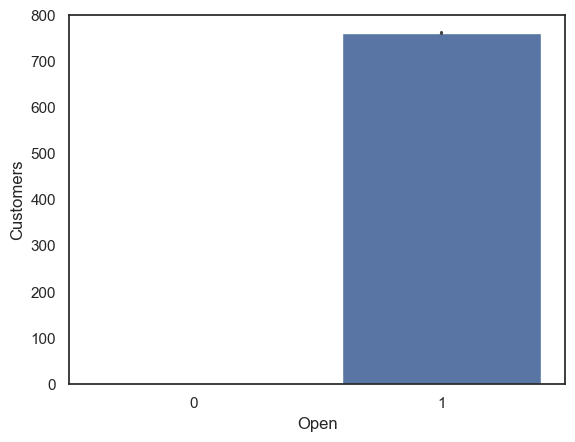

In [66]:
sns.barplot(x="Open",y='Customers', data=df_train)

Note:-Note: from this the trends as expected when the Pharmaceutical is closed there is no customer, All the customer interacts with the pharmaceutical when it is opened

<Figure size 1200x700 with 0 Axes>

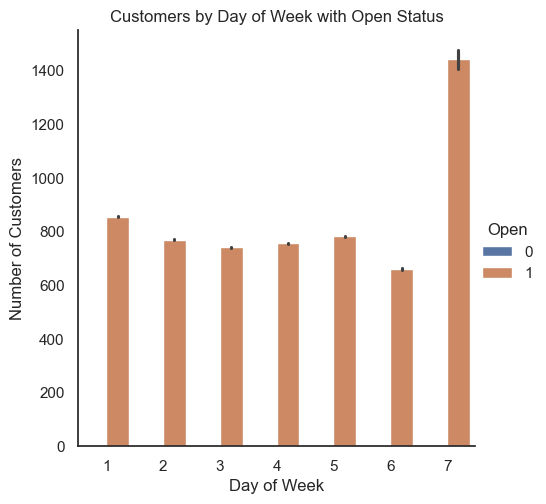

In [67]:
plt.figure(figsize=(12, 7))
sns.catplot(data=train_data, x="DayOfWeek", y="Customers", hue='Open', kind='bar', sharex=False)
plt.title('Customers by Day of Week with Open Status')
plt.xlabel('Day of Week')
plt.ylabel('Number of Customers')
plt.show()

Note:-Note: from this the trends as expected when the Pharmaceutical 0 is closed there is no customer, All the customer interacts with the pharmaceutical when it 1 is opened.

Which stores are opened on all weekdays? How does that affect their sales on
weekends?

In [68]:
import logging
import logging.handlers

In [69]:
def store_days_open(dataset, storeType=['a','b','c']):
    for store in storeType:
        try:

            days = dataset[dataset.Open == True][dataset.StoreType == store].DayOfWeek.unique()
            print(f" For StoreType: {store}, the Days of the week that is OPen are: {days}")
            logging.info(f"Getting days of the week where by the store are open, successfully")
            
        except Exception as e:
            logging.debug(f"Exception occured in getting days in which stores are open, {e}")

In [70]:
storeTypes_list = ['a','b', 'c','d']
store_days_open(train_data, storeTypes_list)

 For StoreType: a, the Days of the week that is OPen are: [5 4 3 2 1 6 7]
 For StoreType: b, the Days of the week that is OPen are: [5 4 3 2 1 7 6]
 For StoreType: c, the Days of the week that is OPen are: [5 4 3 2 1 6]
 For StoreType: d, the Days of the week that is OPen are: [5 4 3 2 1 6 7]


Note:-Store Type 'a, b, and d' are open throught the week (weekdays and weekends), while Store Type 'd' is closed in Sunday

#### Store Type Sales with respect to Days of the week

In [71]:
weekday_data = train_data[['Open', "DayOfWeek","StoreType",'Sales']]

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

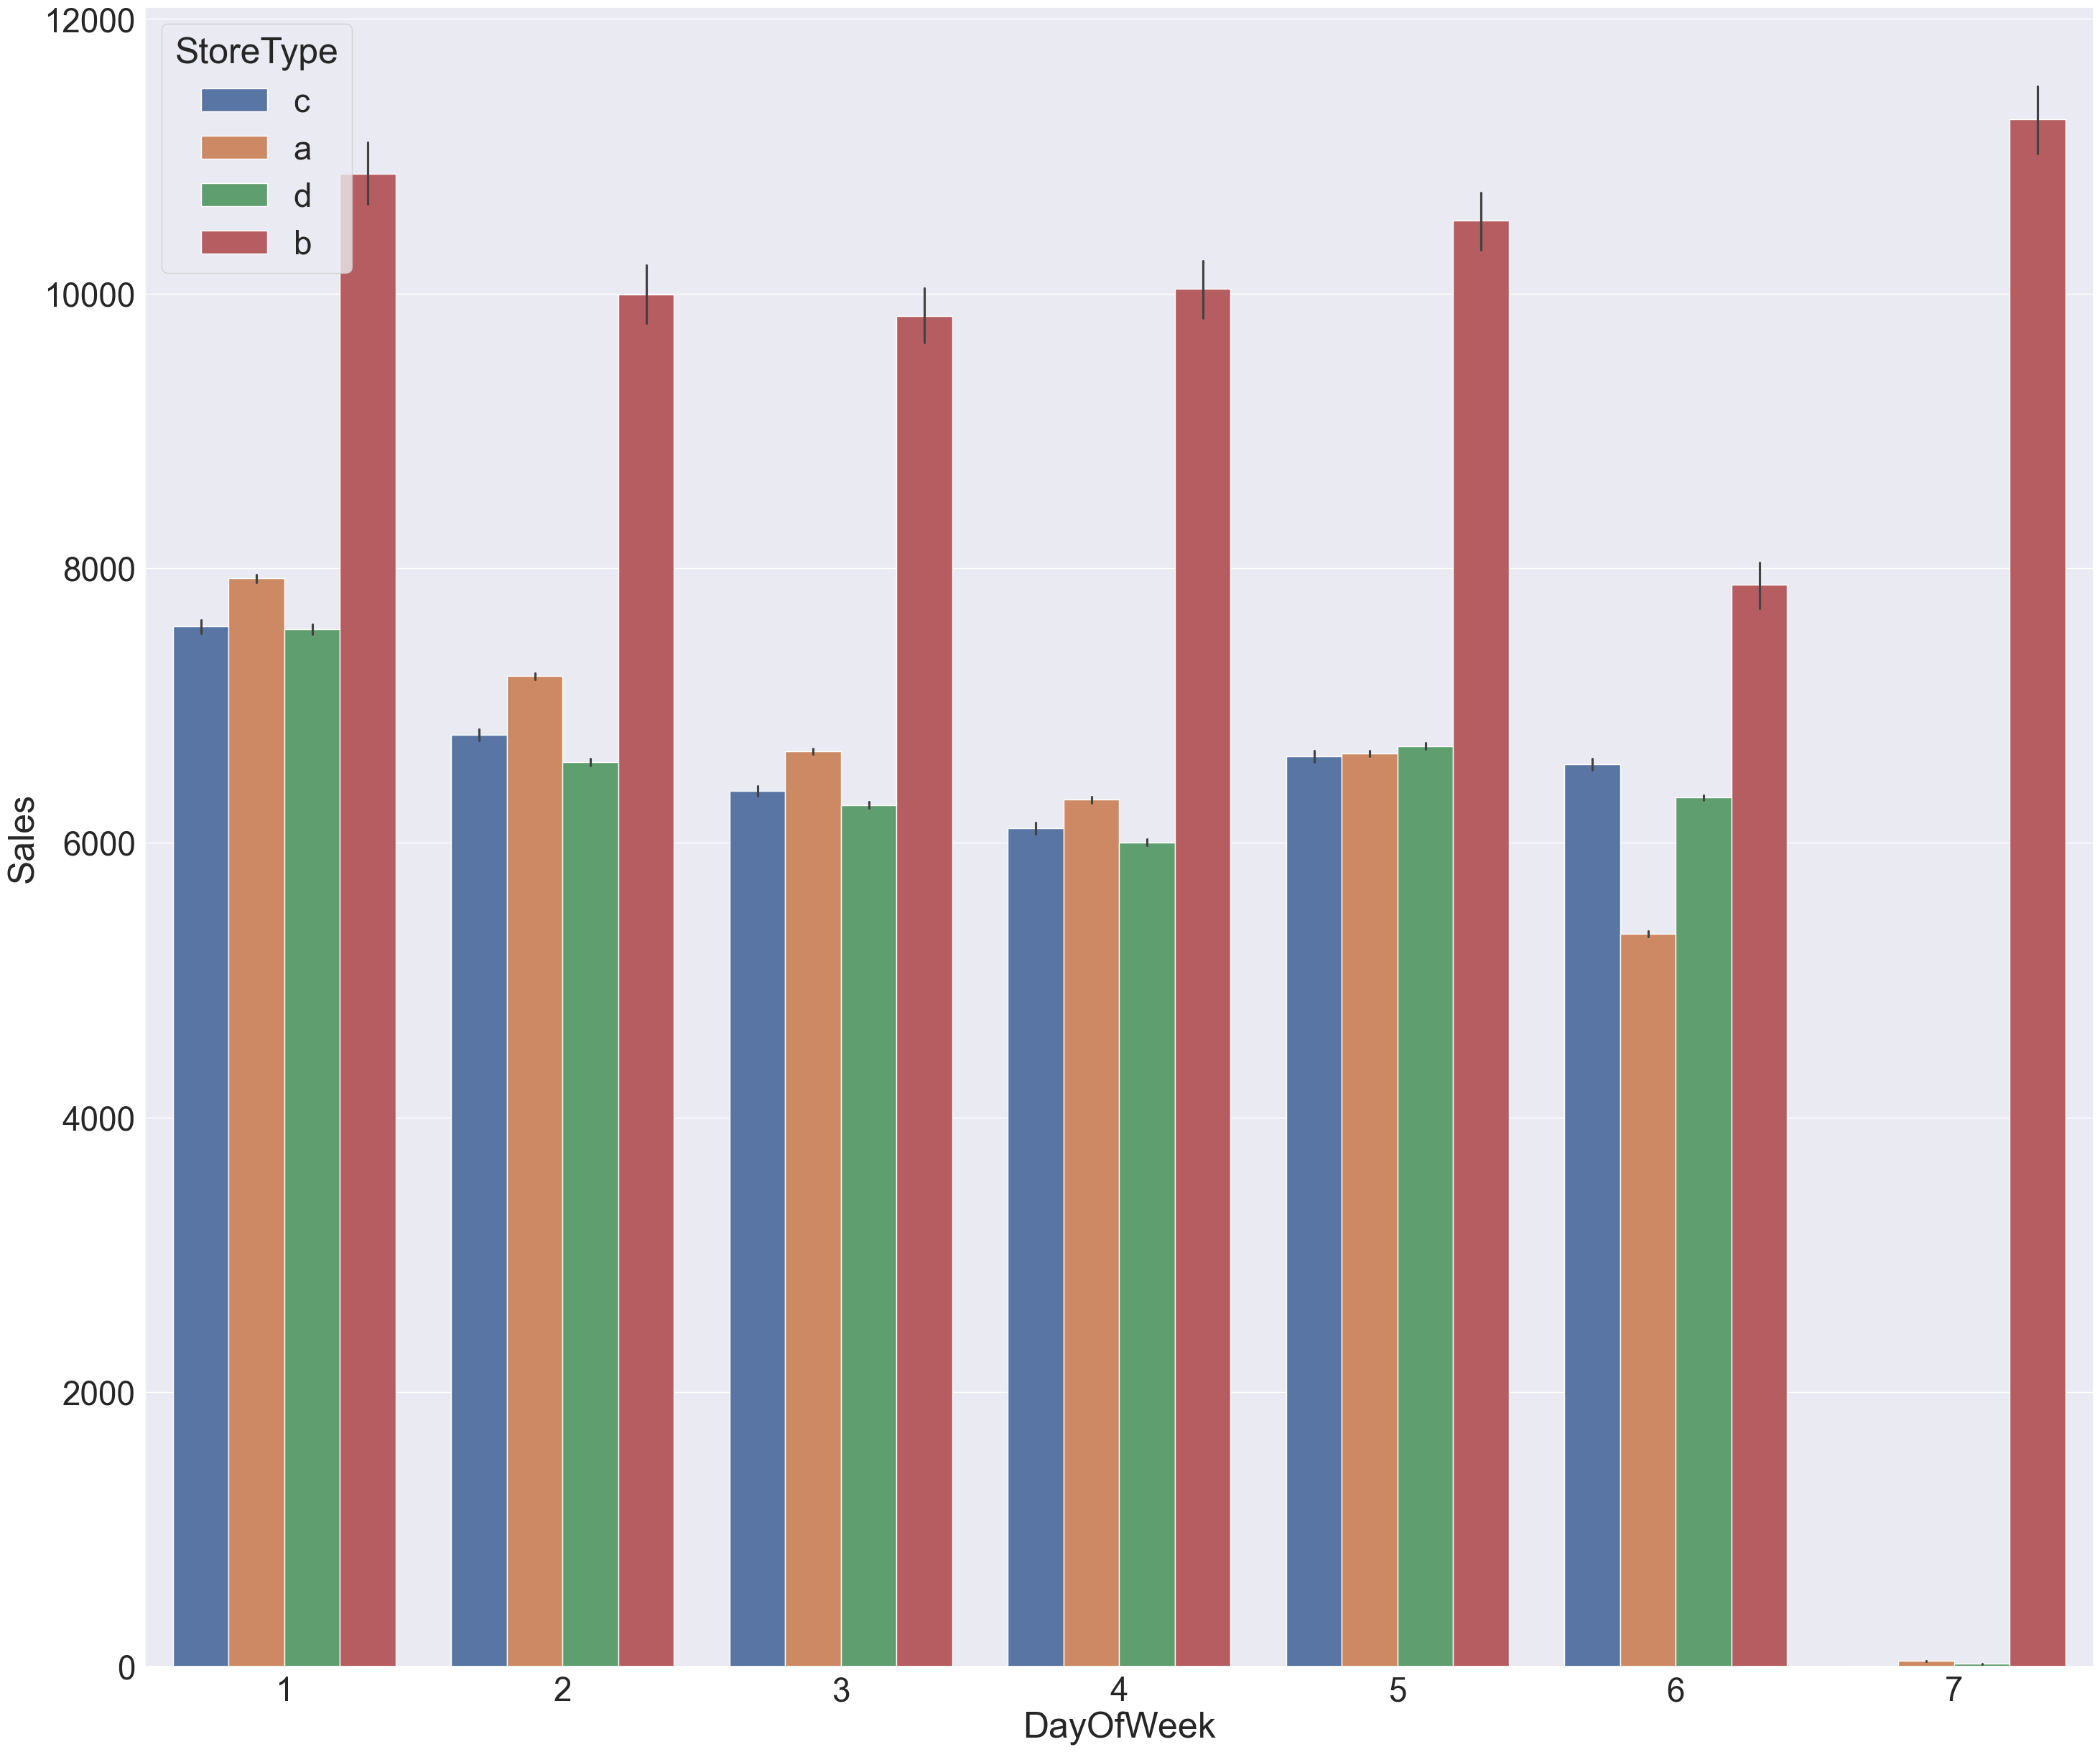

In [72]:
sns.set(font_scale=3)  
plt.figure(figsize=(35,30))
sns.barplot(x="DayOfWeek", y="Sales", hue="StoreType", data=weekday_data)

Note:- from above figure we can see that all Store Types are working all weekdays except Store Type c. and the effect as seen on the 7th day from the figure above the Store Type c is kind have kind of low overall sales as shown in the figure below

Store Types 'a' is Open on all days of the week, and has least sales on Saturday, and almost no sales on sunday,

Store Type 'c' is open on all days of the week, and has almost no sales on sunday,

Store Type 'd' is open from Monday to Saturday, with sales almost constant and on Sunday is closed, and

Store Type 'b' is open on all days of the week, and has almost constant sales during weekdays and less sales on saturday, and highest sales on Sunday.

Check how the assortment type affects sales


In [73]:
# extractng Assortment data to be used for this analysis
assort_data = train_data[['Assortment','Sales']]

In [74]:
assort_data.nunique()

Assortment        3
Sales         21734
dtype: int64

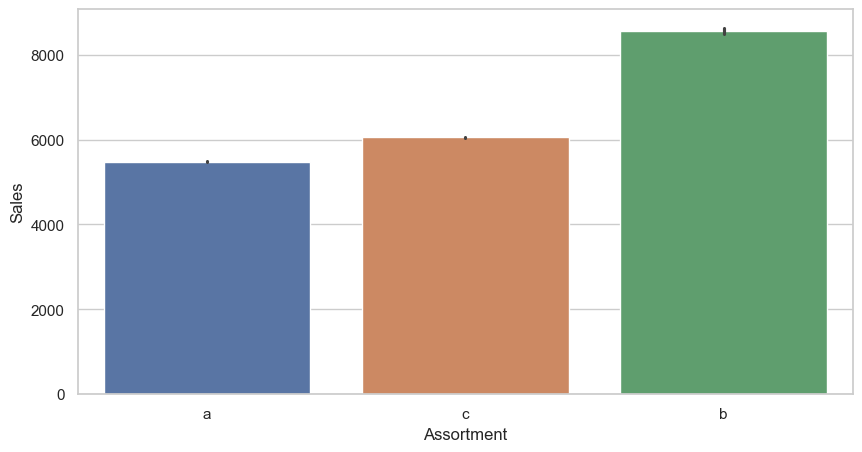

In [75]:
# visulazing the above data we use bar plot this Assortment is categorical
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x='Assortment',y='Sales',hue='Assortment',data=train_data)
plt.show()

Note:-Sales is Highest in Extra assortment type followed by Extended type.

How does the distance to the next competitor affect sales? What if the store and
its competitors all happen to be in city centres, does the distance matter in that
case?

In [76]:
# Statistical Description of CompetitionDistance
round(train_data.CompetitionDistance.describe(),2)

count    1017209.00
mean        5416.63
std         7709.81
min           20.00
25%          700.00
50%         2320.00
75%         6880.00
max        75860.00
Name: CompetitionDistance, dtype: float64

Note :- The minimum, average, and Max. Distance to the Competitor store are 20, 5430 and 75860 distance units respectivelly.

In [77]:
sales = train_data[train_data.CompetitionDistance <= 710.00].Sales.sum()
sales1 = train_data[train_data.CompetitionDistance > 710.00][train_data.CompetitionDistance <= 2330.00].Sales.sum()
sales2 = train_data[train_data.CompetitionDistance > 2330.00][train_data.CompetitionDistance <= 6890.00].Sales.sum()
sales3 = train_data[train_data.CompetitionDistance > 6890.00].Sales.sum()

print(sales, sales1, sales2, sales3)

1568025265 1462736991 1406225904 1436192463


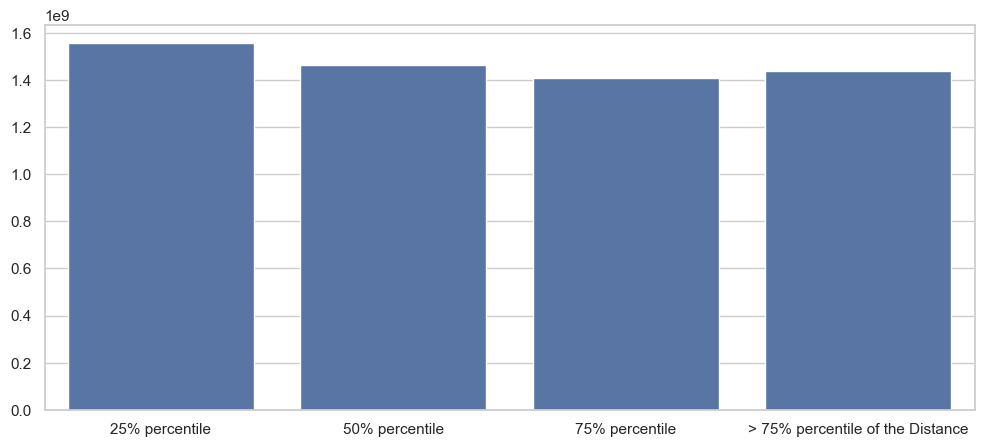

In [78]:
sales_distance = [1556041436, 1462736991, 1406225904, 1436192463]
slaes_names = ['25% percentile','50% percentile','75% percentile', '> 75% percentile of the Distance' ]
plt.figure(figsize=(12,5))
sns.set(style="whitegrid")
sns.barplot(y=sales_distance, x=slaes_names)
plt.show()

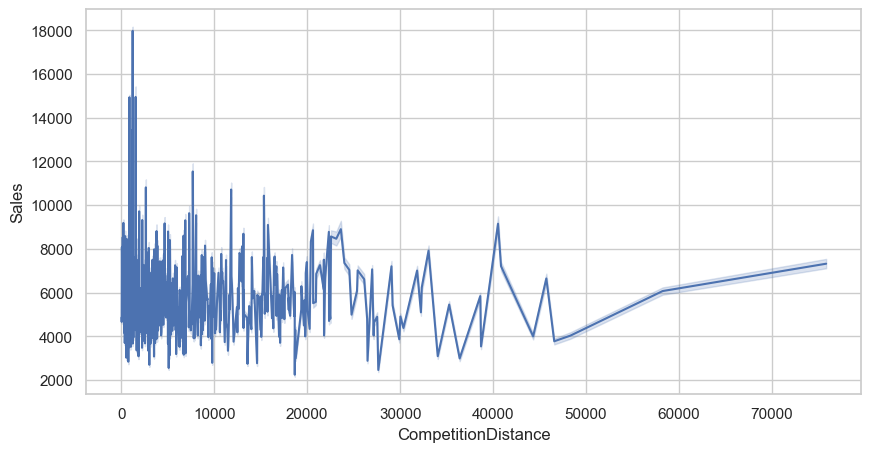

In [79]:
# CompetitionDistance
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.lineplot(x='CompetitionDistance',y='Sales',data=train_data)
plt.show()

Note:-From the above graphs (2 graphs above), the Competitor distance slightly affect the Sales inversely, that is, when the distance increases, the sales slightly decreases.

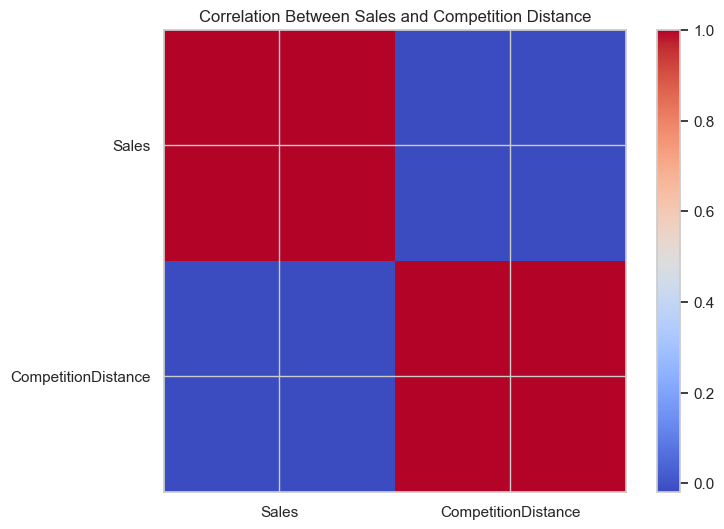

In [80]:
columns = train_data[['Sales', 'CompetitionDistance']]
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.imshow(columns.corr(), cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Between Sales and Competition Distance')
plt.xticks(range(len(columns.columns)), columns.columns)
plt.yticks(range(len(columns.columns)), columns.columns)
plt.show()

Insight :-> The more the closer the stores the higher the sales, and the more the distant the lower the sales.